In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes.csv")

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X, y = df.drop("Outcome", axis = 1), df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle = True, random_state =42)
print("X_train = {} ,X_test = {}, y_train = {}, y_test = {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

for depth in range(3,15):
    model = DecisionTreeClassifier(max_depth = 13, random_state= 42).fit(X_train, y_train)
    print(depth, model.score(X_test,y_test))

X_train = (576, 8) ,X_test = (192, 8), y_train = (576,), y_test = (192,)
3 0.7083333333333334
4 0.7083333333333334
5 0.7083333333333334
6 0.7083333333333334
7 0.7083333333333334
8 0.7083333333333334
9 0.7083333333333334
10 0.7083333333333334
11 0.7083333333333334
12 0.7083333333333334
13 0.7083333333333334
14 0.7083333333333334


# Grid Search

In [20]:
# K-fold가 가능하다.

from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state = 42)

# 무슨 의미일까?
param_grid = {"max_depth": range(3,12),
              "max_features": [0.3, 0.5, 0.7, 0.9, 1]}

# n_jobs는 프로세서(cpu) ,cv = 5(k-fold에서 K개 의미)
clf = GridSearchCV(model, param_grid = param_grid, n_jobs = -1, cv = 5, verbose=2)
clf.fit(X_train, y_train)


Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    2.3s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=2)

In [21]:
clf.best_params_

{'max_depth': 4, 'max_features': 0.9}

In [22]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features=0.9, random_state=42)

In [23]:
clf.best_score_

0.7446926536731635

In [26]:
pd.DataFrame(clf.cv_results_).sort_values(by = "rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,0.007621,0.001597,0.004390,0.002753,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.801724,0.713043,0.739130,0.721739,0.747826,0.744693,0.031054,1
3,0.008818,0.004267,0.003662,0.001668,3,0.9,"{'max_depth': 3, 'max_features': 0.9}",0.741379,0.704348,0.756522,0.739130,0.773913,0.743058,0.023022,2
11,0.008821,0.003415,0.002746,0.000278,5,0.5,"{'max_depth': 5, 'max_features': 0.5}",0.775862,0.721739,0.747826,0.695652,0.773913,0.742999,0.030831,3
13,0.008507,0.003396,0.003795,0.001461,5,0.9,"{'max_depth': 5, 'max_features': 0.9}",0.767241,0.695652,0.765217,0.730435,0.730435,0.737796,0.026471,4
7,0.007994,0.002824,0.003274,0.000988,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.775862,0.704348,0.739130,0.713043,0.756522,0.737781,0.026582,5


In [27]:
clf.score(X_test, y_test)

0.7291666666666666

In [28]:
clf.cv_results_

{'mean_fit_time': array([0.00535874, 0.00740423, 0.00675755, 0.00881777, 0.00643497,
        0.00842295, 0.00607309, 0.00799389, 0.00762081, 0.00574441,
        0.00827479, 0.00882072, 0.00830636, 0.00850677, 0.00637817,
        0.00614581, 0.00616164, 0.00674472, 0.00789418, 0.00526142,
        0.00665526, 0.00668721, 0.0084691 , 0.00796909, 0.00569105,
        0.00528007, 0.00657167, 0.00574374, 0.00569491, 0.00522342,
        0.00428061, 0.00667853, 0.00557489, 0.00523672, 0.00497456,
        0.00462523, 0.00548329, 0.00531921, 0.00551949, 0.00427313,
        0.00454473, 0.00596285, 0.00766664, 0.00716987, 0.00455317]),
 'std_fit_time': array([0.00017394, 0.00335236, 0.00246396, 0.00426683, 0.00314509,
        0.00348671, 0.0006382 , 0.00282411, 0.00159673, 0.00140569,
        0.00225711, 0.00341484, 0.00303735, 0.0033958 , 0.00228505,
        0.00114313, 0.00175888, 0.00200987, 0.00228352, 0.00052125,
        0.00233861, 0.00171036, 0.00435316, 0.00369488, 0.00089887,
        0.000

### Random Search CV은 pass했습니다 ㅠ
# 4.2 다양한 트리계열 머신러닝 모델 사용하기

- 초기 앙상블 방법인 배깅(BootStrap aggregating) 
- 가방에 데이터를 여러개로 나누어 담는다?

- Randomforest는 하나의 tree가 아니라, 여러개의 tree를 그릴 수 있다. --> overfitting 현상을 줄여줄 수 있다

In [30]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7083333333333334

In [35]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state= 42, n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.734375

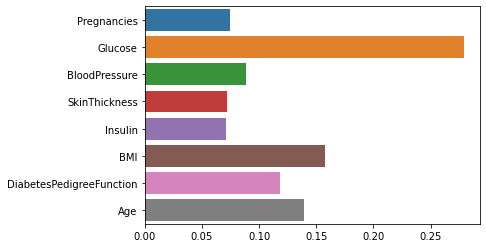

In [36]:
sns.barplot(model.feature_importances_, X_train.columns.tolist())

# 부스팅

- tree는 단일 트리
- 배깅(부트스트랩)의 일종인 랜덤포레스트는 여러개의 트리가 병렬적으로 수행
- 부스팅의 일종인 gradinet는 sequential하게 작동함

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, max_depth = 1,random_state= 42)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7552083333333334

# 정리

1) K-fold validation을 이용해서, 모델의 최적화된 파라미터를 찾기

- GridSearchCV를 이용해서, K-fold cross validation 활용가능하다.
- 이때 최고의 성능을 보인 train (best param)을 찾을 수 있다.

2) 다양한 트리계열 머신러닝
- Decision Tree
- random forest --> bagging(BootStrap aggregating) 방법이라고도 불린다.
- GradientBoosting --> 부스팅이라고 불림

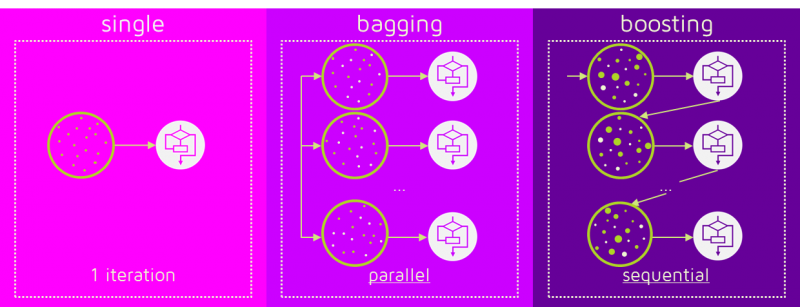